# <a> Nile University


> 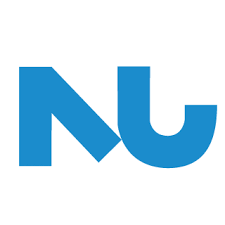

> ## <a> AI Hackathon Orientation

#pip

In [ ]:
!pip install transformers[sentencepiece]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 30.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 57.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 27.7 MB/s eta 0:00:00


In [ ]:
!pip install datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.8/462.8 KB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.0/132.0 KB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 213.0/213.0 KB 26.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 KB 17.7 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


# Import

In [ ]:
import random
import pandas as pd
import gdown

import json
import re
import string 

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from collections import OrderedDict
import warnings

import torch
import numpy as np

from torch.utils.data import DataLoader
from datasets import load_dataset, load_metric, Dataset

from transformers import AutoTokenizer, DataCollatorWithPadding
from transformers import AutoModelForSequenceClassification
from transformers import AdamW

from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dropout, Dense, LSTM, Bidirectional,Embedding, GlobalMaxPool1D, Flatten, Conv1D, MaxPooling1D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

from scipy.special import softmax

import csv
import urllib.request

import gc

from keras.utils import to_categorical
from keras.preprocessing.text import Tokenizer

In [ ]:
# import packages and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler


from sklearn.model_selection import train_test_split,  GridSearchCV
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_predict
from statistics import mean, stdev
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import KFold,train_test_split,cross_val_score

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# import fuzzywuzzy
# from fuzzywuzzy import process
# import chardet

#Visualizing the Decision Tree
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus



import pandas as pd
from sklearn.model_selection import train_test_split
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification, AdamW
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from sklearn.metrics import classification_report

# Reading

In [ ]:
df_train = pd.read_csv('/content/train.csv')
df_train.shape

(9368, 3)

In [ ]:
df_train

,hadith_text,subtext,Named_entity
0,حدثنا محمد بن المثنى ، حدثنا إسحاق بن يوسف ، ح...,الظهر,0
1,حدثنا أبو اليمان ، أخبرنا شعيب ، عن الزهري ، ق...,والمروة,1
2,حدثنا عبد الله بن عبد الوهاب ، حدثنا خالد بن ا...,عشاء,0
3,حدثنا موسى بن إسماعيل ، حدثنا جرير بن حازم ، ح...,الربا,2
4,حدثنا عبد الله بن يوسف ، أخبرنا مالك ، عن إسحا...,مالك,3
...,...,...,...
9363,حدثنا محمد بن عبد الله ، حدثنا عبد العزيز بن ع...,محمد بن عبد الله,3
9364,حدثنا أحمد بن محمد ، أخبرنا عبد الله ، أخبرنا ...,يونس,3
9365,حدثنا عمر بن حفص بن غياث ، حدثنا أبي ، حدثنا ا...,الأسود,3
9366,حدثنا عبد الله بن يوسف ، قال أخبرنا مالك ، عن ...,أبيه,3


#preprocessing

In [ ]:
df_train["Named_entity"].value_counts().to_frame()

,Named_entity
3,6366
4,917
5,915
1,325
0,258
2,169
6,104
10,97
7,80
11,49


In [ ]:
df_train = df_train.dropna()

In [ ]:
df_train = df_train.drop_duplicates(subset = ['hadith_text', 'subtext', 'Named_entity'])

In [ ]:
df_train.isnull().sum()

hadith_text     0
subtext         0
Named_entity    0
dtype: int64

In [ ]:
df_train.duplicated().sum()

0

In [ ]:
# Preprocess the data
tokenizer = AutoTokenizer.from_pretrained('microsoft/Multilingual-MiniLM-L12-H384')
encoded_texts = tokenizer(list(df_train['hadith_text']), list(df_train['subtext']), padding=True, truncation=True, max_length=32, return_tensors='pt')
labels = torch.tensor(list(df_train['Named_entity']))

> <a> Split the data

In [ ]:
#  Split the data
train_inputs, val_inputs, train_labels, val_labels = train_test_split(encoded_texts['input_ids'], labels, test_size=0.2, random_state=42)

> <a> Set batch size and create data loaders

In [ ]:
# Set batch size and create data loaders
batch_size = 8
train_data = TensorDataset(train_inputs, train_labels)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

val_data = TensorDataset(val_inputs, val_labels)
val_sampler = SequentialSampler(val_data)
val_dataloader = DataLoader(val_data, sampler=val_sampler, batch_size=batch_size)


> <a> Load & preprocess the test data

In [ ]:
# Load the test data
df_test = pd.read_csv('/content/test.csv')

# Preprocess the test data
test_input_ids = tokenizer(list(df_test['hadith_text'].astype(str)), list(df_test['subtext'].astype(str)), padding=True, truncation=True, max_length=32, return_tensors='pt')['input_ids']

# Set batch size and create data loader
test_data = TensorDataset(test_input_ids)
test_sampler = SequentialSampler(test_data)
test_dataloader = DataLoader(test_data, sampler=test_sampler, batch_size=batch_size)


> <a> Load a pre-trained NLP Transformer model

In [ ]:
# Set the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load a pre-trained NLP Transformer model
model = AutoModelForSequenceClassification.from_pretrained('microsoft/Multilingual-MiniLM-L12-H384', num_labels=17, output_attentions=False, output_hidden_states=False)
model.to(device)

optimizer = AdamW(model.parameters(), lr=2e-5, eps=1e-8)


> <a> Train and Evaluate the model.

In [ ]:
# Train the model
epochs = 30
for epoch in range(epochs):
    print('======== Epoch {:} / {:} ========'.format(epoch + 1, epochs))
    total_train_loss = 0
    model.train()
    
    for step, batch in enumerate(train_dataloader):
        # Move batch to the GPU
        batch = tuple(t.to(device) for t in batch)
        b_input_ids, b_labels = batch
        
        # Forward pass
        model.zero_grad()        
        outputs = model(b_input_ids, labels=b_labels)
        loss = outputs.loss
        total_train_loss += loss.item()
        
        # Backward pass and optimization step
        loss.backward()
        torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
        optimizer.step()

    avg_train_loss = total_train_loss / len(train_dataloader)
    print('Average training loss: {0:.2f}'.format(avg_train_loss))

    # Evaluate the model
    model.eval()
    total_val_loss = 0
    predictions, true_labels = [], []
    
    for batch in val_dataloader:
        batch = tuple(t.to(device) for t in batch)
        b_input_ids, b_labels = batch
        with torch.no_grad():
            outputs = model(b_input_ids, labels=b_labels)
            loss = outputs.loss
            logits = outputs.logits
        
        total_val_loss += loss.item()
        
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        predictions.append(logits)
        true_labels.append(label_ids)

    avg_val_loss = total_val_loss / len(val_dataloader)
    print('Average validation loss: {0:.2f}'.format(avg_val_loss))
    
    # Calculate validation accuracy
    predictions = np.concatenate(predictions, axis=0)
    true_labels = np.concatenate(true_labels, axis=0)
    pred_labels = np.argmax(predictions, axis=1)
    val_accuracy = (pred_labels == true_labels).mean()
    print('Validation accuracy: {0:.2f}'.format(val_accuracy))

    # Convert predictions to class labels
    _, predicted_labels = torch.max(torch.tensor(predictions), dim=1)

    # Print classification report
    print(classification_report(true_labels, predicted_labels))

    # Evaluate the model on the test data and make predictions_test
    model.eval()
    predictions_test = []
    for batch in test_dataloader:
        batch = tuple(t.to(device) for t in batch)
        b_input_ids = batch[0]
        with torch.no_grad():
            outputs = model(b_input_ids)
            logits = outputs.logits

        logits = logits.detach().cpu().numpy()
        predictions_test.append(logits)

    # Concatenate the predictions_test and convert them to class labels
    predictions_test = np.concatenate(predictions_test, axis=0)
    _, predictions_test_labels = torch.max(torch.tensor(predictions_test), dim=1)

    # Save the predictions to a CSV file
    df_pred = pd.DataFrame({'Named_entity': predictions_test_labels}, index=df_test['IDs'])
    df_pred.index.name = 'IDs'
    df_pred.to_csv('predictions_'+str(epoch)+'_.csv')

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at microsoft/Multilingual-MiniLM-L12-H384 and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.8/dist-packages/transformers/optimization.py:306: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


======== Epoch 1 / 30 ========
Average training loss: 1.20
Average validation loss: 0.73
Validation accuracy: 0.80
              precision    recall  f1-score   support

           0       0.28      0.94      0.43        54
           1       0.00      0.00      0.00        53
           2       0.00      0.00      0.00        33
           3       0.84      1.00      0.92      1243
           4       0.00      0.00      0.00       194
           5       1.00      0.97      0.99       179
           6       0.00      0.00      0.00        23
           7       0.00      0.00      0.00         9
           8       0.00      0.00      0.00         4
           9       0.00      0.00      0.00         5
          10       0.00      0.00      0.00        14
          11       0.00      0.00      0.00         9
          13       0.00      0.00      0.00         4
          14       0.00      0.00      0.00         2

    accuracy                           0.80      1826
   macro avg       

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


======== Epoch 2 / 30 ========
Average training loss: 0.67
Average validation loss: 0.57
Validation accuracy: 0.80
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        54
           1       0.36      0.92      0.52        53
           2       0.00      0.00      0.00        33
           3       0.86      1.00      0.92      1243
           4       0.00      0.00      0.00       194
           5       1.00      0.98      0.99       179
           6       0.00      0.00      0.00        23
           7       0.00      0.00      0.00         9
           8       0.00      0.00      0.00         4
           9       0.00      0.00      0.00         5
          10       0.03      0.07      0.04        14
          11       0.00      0.00      0.00         9
          13       0.00      0.00      0.00         4
          14       0.00      0.00      0.00         2

    accuracy                           0.80      1826
   macro avg       

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


======== Epoch 3 / 30 ========
Average training loss: 0.55
Average validation loss: 0.44
Validation accuracy: 0.84
              precision    recall  f1-score   support

           0       0.61      0.93      0.74        54
           1       0.86      0.91      0.88        53
           2       0.50      0.03      0.06        33
           3       0.86      1.00      0.92      1243
           4       1.00      0.02      0.04       194
           5       1.00      1.00      1.00       179
           6       0.00      0.00      0.00        23
           7       0.00      0.00      0.00         9
           8       0.00      0.00      0.00         4
           9       0.00      0.00      0.00         5
          10       0.29      1.00      0.45        14
          11       0.37      0.78      0.50         9
          13       0.00      0.00      0.00         4
          14       0.00      0.00      0.00         2

    accuracy                           0.84      1826
   macro avg       

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


======== Epoch 4 / 30 ========
Average training loss: 0.45
Average validation loss: 0.36
Validation accuracy: 0.87
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        54
           1       0.88      0.94      0.91        53
           2       0.94      0.97      0.96        33
           3       0.86      1.00      0.92      1243
           4       0.00      0.00      0.00       194
           5       1.00      1.00      1.00       179
           6       0.00      0.00      0.00        23
           7       1.00      0.56      0.71         9
           8       0.31      1.00      0.47         4
           9       0.00      0.00      0.00         5
          10       0.38      1.00      0.55        14
          11       1.00      1.00      1.00         9
          13       0.00      0.00      0.00         4
          14       0.00      0.00      0.00         2

    accuracy                           0.87      1826
   macro avg       

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


======== Epoch 5 / 30 ========
Average training loss: 0.37
Average validation loss: 0.37
Validation accuracy: 0.88
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        54
           1       0.77      0.94      0.85        53
           2       0.94      0.97      0.96        33
           3       0.87      0.99      0.92      1243
           4       0.56      0.05      0.09       194
           5       1.00      1.00      1.00       179
           6       1.00      0.96      0.98        23
           7       1.00      0.56      0.71         9
           8       0.33      1.00      0.50         4
           9       0.00      0.00      0.00         5
          10       0.93      1.00      0.97        14
          11       0.82      1.00      0.90         9
          13       0.00      0.00      0.00         4
          14       0.00      0.00      0.00         2

    accuracy                           0.88      1826
   macro avg       

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


======== Epoch 6 / 30 ========
Average training loss: 0.35
Average validation loss: 0.34
Validation accuracy: 0.88
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        54
           1       0.88      0.94      0.91        53
           2       0.97      0.94      0.95        33
           3       0.87      0.99      0.93      1243
           4       0.73      0.04      0.08       194
           5       1.00      1.00      1.00       179
           6       1.00      1.00      1.00        23
           7       1.00      0.67      0.80         9
           8       0.00      0.00      0.00         4
           9       0.29      1.00      0.45         5
          10       0.93      1.00      0.97        14
          11       1.00      1.00      1.00         9
          13       0.00      0.00      0.00         4
          14       0.00      0.00      0.00         2

    accuracy                           0.88      1826
   macro avg       

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


======== Epoch 7 / 30 ========
Average training loss: 0.31
Average validation loss: 0.34
Validation accuracy: 0.88
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        54
           1       0.86      0.94      0.90        53
           2       1.00      0.94      0.97        33
           3       0.87      0.99      0.93      1243
           4       0.71      0.06      0.11       194
           5       0.99      1.00      0.99       179
           6       0.96      1.00      0.98        23
           7       0.67      0.67      0.67         9
           8       0.33      1.00      0.50         4
           9       0.00      0.00      0.00         5
          10       1.00      1.00      1.00        14
          11       1.00      1.00      1.00         9
          13       0.00      0.00      0.00         4
          14       0.00      0.00      0.00         2

    accuracy                           0.88      1826
   macro avg       

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


======== Epoch 8 / 30 ========
Average training loss: 0.30
Average validation loss: 0.31
Validation accuracy: 0.88
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        54
           1       0.89      0.94      0.92        53
           2       0.97      0.97      0.97        33
           3       0.87      0.99      0.92      1243
           4       0.67      0.04      0.08       194
           5       1.00      1.00      1.00       179
           6       1.00      1.00      1.00        23
           7       0.58      0.78      0.67         9
           8       0.36      1.00      0.53         4
           9       0.33      0.20      0.25         5
          10       1.00      1.00      1.00        14
          11       1.00      1.00      1.00         9
          13       0.00      0.00      0.00         4
          14       0.00      0.00      0.00         2

    accuracy                           0.88      1826
   macro avg       

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


======== Epoch 9 / 30 ========
Average training loss: 0.28
Average validation loss: 0.32
Validation accuracy: 0.87
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        54
           1       0.93      0.98      0.95        53
           2       1.00      0.97      0.98        33
           3       0.91      0.91      0.91      1243
           4       0.44      0.47      0.45       194
           5       0.99      1.00      0.99       179
           6       1.00      1.00      1.00        23
           7       1.00      0.78      0.88         9
           8       0.44      1.00      0.62         4
           9       1.00      0.40      0.57         5
          10       1.00      1.00      1.00        14
          11       1.00      1.00      1.00         9
          13       0.00      0.00      0.00         4
          14       0.00      0.00      0.00         2

    accuracy                           0.87      1826
   macro avg       

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


======== Epoch 10 / 30 ========
Average training loss: 0.27
Average validation loss: 0.39
Validation accuracy: 0.88
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        54
           1       0.94      0.94      0.94        53
           2       0.97      0.97      0.97        33
           3       0.87      0.98      0.92      1243
           4       0.38      0.05      0.08       194
           5       1.00      1.00      1.00       179
           6       1.00      1.00      1.00        23
           7       0.58      0.78      0.67         9
           8       0.57      1.00      0.73         4
           9       0.62      1.00      0.77         5
          10       1.00      1.00      1.00        14
          11       1.00      1.00      1.00         9
          13       0.00      0.00      0.00         4
          14       0.00      0.00      0.00         2

    accuracy                           0.88      1826
   macro avg      

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


======== Epoch 11 / 30 ========
Average training loss: 0.28
Average validation loss: 0.39
Validation accuracy: 0.87
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        54
           1       0.76      0.98      0.86        53
           2       1.00      0.97      0.98        33
           3       0.87      0.97      0.92      1243
           4       0.39      0.10      0.16       194
           5       0.99      1.00      1.00       179
           6       1.00      1.00      1.00        23
           7       0.88      0.78      0.82         9
           8       0.80      1.00      0.89         4
           9       0.56      1.00      0.71         5
          10       0.93      1.00      0.97        14
          11       1.00      1.00      1.00         9
          13       0.00      0.00      0.00         4
          14       0.00      0.00      0.00         2

    accuracy                           0.87      1826
   macro avg      

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


======== Epoch 12 / 30 ========
Average training loss: 0.26
Average validation loss: 0.36
Validation accuracy: 0.86
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        54
           1       0.88      0.98      0.93        53
           2       1.00      0.97      0.98        33
           3       0.91      0.89      0.90      1243
           4       0.40      0.45      0.42       194
           5       0.99      1.00      0.99       179
           6       1.00      1.00      1.00        23
           7       0.60      0.67      0.63         9
           8       0.80      1.00      0.89         4
           9       0.62      1.00      0.77         5
          10       1.00      1.00      1.00        14
          11       0.90      1.00      0.95         9
          13       0.00      0.00      0.00         4
          14       0.00      0.00      0.00         2

    accuracy                           0.86      1826
   macro avg      

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


======== Epoch 13 / 30 ========
Average training loss: 0.26
Average validation loss: 0.31
Validation accuracy: 0.88
              precision    recall  f1-score   support

           0       0.98      0.94      0.96        54
           1       0.93      0.94      0.93        53
           2       0.97      0.97      0.97        33
           3       0.87      0.99      0.93      1243
           4       0.50      0.05      0.08       194
           5       1.00      1.00      1.00       179
           6       1.00      1.00      1.00        23
           7       0.78      0.78      0.78         9
           8       0.67      1.00      0.80         4
           9       0.56      1.00      0.71         5
          10       1.00      1.00      1.00        14
          11       1.00      1.00      1.00         9
          13       0.00      0.00      0.00         4
          14       0.00      0.00      0.00         2

    accuracy                           0.88      1826
   macro avg      

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


======== Epoch 14 / 30 ========
Average training loss: 0.25
Average validation loss: 0.38
Validation accuracy: 0.87
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        54
           1       0.86      0.96      0.91        53
           2       1.00      0.97      0.98        33
           3       0.89      0.93      0.91      1243
           4       0.40      0.27      0.33       194
           5       0.99      1.00      1.00       179
           6       1.00      1.00      1.00        23
           7       0.78      0.78      0.78         9
           8       0.80      1.00      0.89         4
           9       0.71      1.00      0.83         5
          10       1.00      1.00      1.00        14
          11       1.00      1.00      1.00         9
          13       1.00      0.50      0.67         4
          14       0.00      0.00      0.00         2

    accuracy                           0.87      1826
   macro avg      

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


======== Epoch 15 / 30 ========
Average training loss: 0.24
Average validation loss: 0.38
Validation accuracy: 0.88
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        54
           1       0.94      0.96      0.95        53
           2       1.00      0.97      0.98        33
           3       0.87      0.97      0.92      1243
           4       0.38      0.11      0.17       194
           5       1.00      1.00      1.00       179
           6       1.00      1.00      1.00        23
           7       0.88      0.78      0.82         9
           8       0.67      1.00      0.80         4
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00        14
          11       1.00      1.00      1.00         9
          13       1.00      0.75      0.86         4
          14       0.00      0.00      0.00         2

    accuracy                           0.88      1826
   macro avg      

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


======== Epoch 16 / 30 ========
Average training loss: 0.24
Average validation loss: 0.43
Validation accuracy: 0.85
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        54
           1       0.93      0.98      0.95        53
           2       1.00      0.97      0.98        33
           3       0.90      0.87      0.89      1243
           4       0.34      0.41      0.37       194
           5       1.00      0.99      1.00       179
           6       1.00      1.00      1.00        23
           7       0.78      0.78      0.78         9
           8       0.80      1.00      0.89         4
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00        14
          11       1.00      1.00      1.00         9
          13       1.00      0.75      0.86         4
          14       0.50      0.50      0.50         2

    accuracy                           0.85      1826
   macro avg      

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


======== Epoch 19 / 30 ========
Average training loss: 0.23
Average validation loss: 0.42
Validation accuracy: 0.88
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        54
           1       0.98      0.98      0.98        53
           2       1.00      0.97      0.98        33
           3       0.87      0.98      0.92      1243
           4       0.41      0.09      0.15       194
           5       1.00      0.99      0.99       179
           6       1.00      1.00      1.00        23
           7       0.50      0.78      0.61         9
           8       0.80      1.00      0.89         4
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00        14
          11       1.00      1.00      1.00         9
          13       0.80      1.00      0.89         4
          14       0.33      0.50      0.40         2

    accuracy                           0.88      1826
   macro avg      

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


======== Epoch 22 / 30 ========
Average training loss: 0.22
Average validation loss: 0.47
Validation accuracy: 0.85
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        54
           1       0.87      0.98      0.92        53
           2       0.97      0.97      0.97        33
           3       0.88      0.91      0.89      1243
           4       0.27      0.19      0.22       194
           5       1.00      1.00      1.00       179
           6       1.00      1.00      1.00        23
           7       0.78      0.78      0.78         9
           8       0.80      1.00      0.89         4
           9       1.00      1.00      1.00         5
          10       0.74      1.00      0.85        14
          11       1.00      1.00      1.00         9
          13       0.67      1.00      0.80         4
          14       1.00      0.50      0.67         2

    accuracy                           0.85      1826
   macro avg      

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


======== Epoch 29 / 30 ========
Average training loss: 0.20
Average validation loss: 0.55
Validation accuracy: 0.83
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        54
           1       0.93      0.98      0.95        53
           2       0.97      0.97      0.97        33
           3       0.88      0.88      0.88      1243
           4       0.25      0.26      0.26       194
           5       1.00      1.00      1.00       179
           6       0.96      1.00      0.98        23
           7       0.64      0.78      0.70         9
           8       0.80      1.00      0.89         4
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00        14
          11       1.00      1.00      1.00         9
          12       0.00      0.00      0.00         0
          13       1.00      0.75      0.86         4
          14       1.00      0.50      0.67         2

    accuracy      

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


======== Epoch 30 / 30 ========
Average training loss: 0.20
Average validation loss: 0.64
Validation accuracy: 0.85
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        54
           1       0.93      0.98      0.95        53
           2       0.97      0.97      0.97        33
           3       0.88      0.92      0.90      1243
           4       0.24      0.16      0.19       194
           5       1.00      0.99      1.00       179
           6       1.00      1.00      1.00        23
           7       0.64      0.78      0.70         9
           8       0.80      1.00      0.89         4
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00        14
          11       1.00      1.00      1.00         9
          12       0.00      0.00      0.00         0
          13       1.00      0.75      0.86         4
          14       0.50      0.50      0.50         2

    accuracy      

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
